In [1]:
%pylab inline
figsize(12,8)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import clstm

Let's try to train an LSTM to solve an inverse interpolation problem. This is a bit of a filtering problem: a smooth input signal has some dropouts that need to be restored.

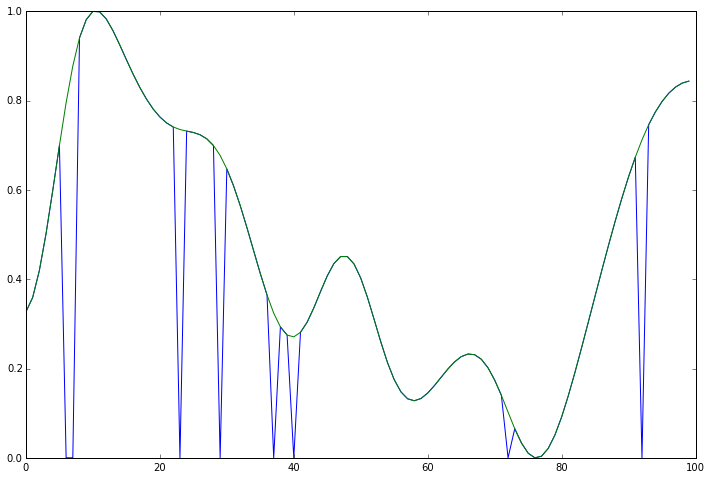

In [3]:
from scipy.ndimage import filters
def gentest(N=100,p=0.1,s=5.0):
    ys = array(rand(N),'f')
    ys = filters.gaussian_filter(ys,s)
    ys -= amin(ys); ys /= amax(ys)
    xs = ys.copy()
    xs[rand(N)<p] = 0.0
    return xs,ys
xs, ys = gentest()
plot(xs)
plot(ys)

We construct a bidirectional LSTM with a linear output layer and 5 state variables.

In [4]:
net = clstm.make_net("BIDILSTM")
net.set("ninput",1)
net.set("nhidden",5)
net.set("noutput",1)
net.set("output_type","LinearLayer")
net.initialize()
net.setLearningRate(1e-2,0.9)
print clstm.network_info(net)

.bidilstm: 0.010000 0.900000 1 1
.bidilstm.parallel: 0.010000 0.900000 1 10
.bidilstm.parallel.lstm: 0.010000 0.900000 1 5
.bidilstm.parallel.reversed: 0.010000 0.900000 1 5
.bidilstm.parallel.reversed.lstm: 0.010000 0.900000 1 5
.bidilstm.full_linear: 0.010000 0.900000 10 1



Now we generate 50000 training cases and train on that.

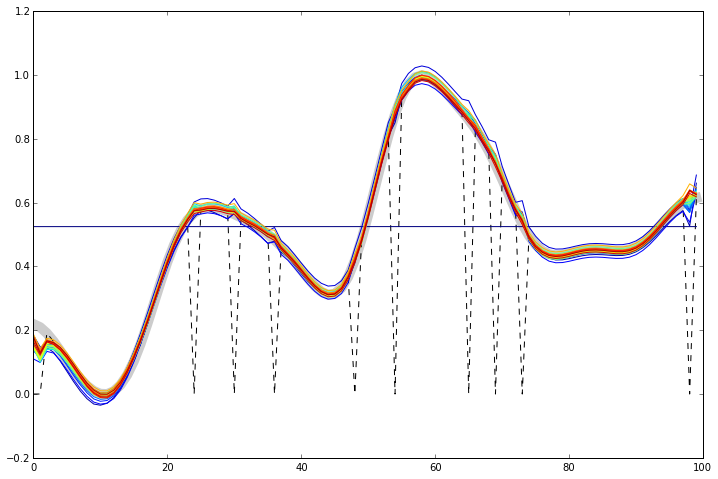

In [5]:
testin,testout = gentest()
plot(testin, '--', c='black')
plot(testout, c="black", linewidth=10, alpha=0.2)
ntrain = 50000
for i in range(ntrain):
    xs,ys = gentest()
    net.inputs.aset(xs.reshape(-1,1,1))
    net.forward()
    net.d_outputs.aset(ys.reshape(-1,1,1)-net.outputs.array())
    net.backward()
    net.update()
    if i%2000==0:
        net.inputs.aset(testin.reshape(-1,1,1))
        net.forward()
        plot(net.outputs.array()[:,0,0],c=cm.jet(i*1.0/ntrain))

The test case suggests that interpolation works pretty well.